In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing

In [16]:
print(tf.__version__)

2.4.1


In [12]:
df = pd.read_csv('/content/Audiobooks_data.csv')
df

,ID,Book length (mins) overall,Book length (mins) avg,Price overall,Price avg,Review,Review 10/10,Minutes listened,Completion,Support requests,Last visited minus Purchase date,Targets
0,994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
3,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
4,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14079,28220,1620.0,1620,5.33,5.33,1,9.00,0.61,988.2,0,4,0
14080,28671,1080.0,1080,6.55,6.55,1,6.00,0.29,313.2,0,29,0
14081,31134,2160.0,2160,6.14,6.14,0,8.91,0.00,0.0,0,0,0
14082,32832,1620.0,1620,5.33,5.33,1,8.00,0.38,615.6,0,90,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                14084 non-null  int64  
 1   Book length (mins) overall        14084 non-null  float64
 2   Book length (mins) avg            14084 non-null  int64  
 3   Price overall                     14084 non-null  float64
 4   Price avg                         14084 non-null  float64
 5   Review                            14084 non-null  int64  
 6   Review 10/10                      14084 non-null  float64
 7   Minutes listened                  14084 non-null  float64
 8   Completion                        14084 non-null  float64
 9   Support requests                  14084 non-null  int64  
 10  Last visited minus Purchase date  14084 non-null  int64  
 11  Targets                           14084 non-null  int64  
dtypes: f

Description:

**ID:** User ID <br>
**Book length (mins) overall:** The sum of the lengths of purchased books <br>
**Book length (mins) avg:** The sum of the length divided by the number of purchases<br>
**Price overall:** Total price of purchased books <br>
**Price avg:** Total price of purchased books divided by the number of purchases <br>
**Review:** Boolean data to shows if the customer left a review or not <br>
**Review 10/10:** Measures the review from a customer from 1 to 10 <br>
**Minutes listened:** Total minutes of a customer to listen to the book <br>
**Completion:** percentage of minutes listened by book length overall<br>
**Support requests:** Number of a customer to use support requests (forgotten password to assistance)<br>
**Last visited minus Purchase date:** The difference between first purchasing and last time thee customer accessing the platform.<br>
**Targets:** To show if the customer would buy another book for the next six months or not. If yes, the target is 1. If not, the target is 0 

In [14]:
df.describe()

,ID,Book length (mins) overall,Book length (mins) avg,Price overall,Price avg,Review,Review 10/10,Minutes listened,Completion,Support requests,Last visited minus Purchase date,Targets
count,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000
mean,16772.491551,1591.281685,1678.608634,7.103791,7.543805,0.160750,8.909795,0.125659,189.888983,0.070222,61.935033,0.158833
std,9691.807248,504.340663,654.838599,4.931673,5.560129,0.367313,0.643406,0.241206,371.084010,0.472157,88.207634,0.365533
min,2.000000,216.000000,216.000000,3.860000,3.860000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8368.000000,1188.000000,1188.000000,5.330000,5.330000,0.000000,8.910000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16711.500000,1620.000000,1620.000000,5.950000,6.070000,0.000000,8.910000,0.000000,0.000000,0.000000,11.000000,0.000000
75%,25187.250000,2160.000000,2160.000000,8.000000,8.000000,0.000000,8.910000,0.130000,194.400000,0.000000,105.000000,0.000000
max,33683.000000,2160.000000,7020.000000,130.940000,130.940000,1.000000,10.000000,1.000000,2160.000000,30.000000,464.000000,1.000000


The next step is put inputs and targets into numpy array.

In [2]:
raw_csv = np.loadtxt('/content/Audiobooks_data.csv', delimiter=',')
unscaled_inputs = raw_csv[:, 1:-1]
targets = raw_csv[:, -1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


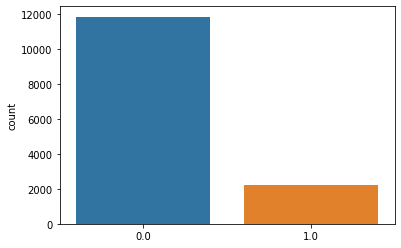

In [10]:
sns.countplot(targets)

Based on this visualization, we know that the dataset is highly unbalanced. Therefore, we should delete some of 0 class until frequency of class 0 is same as class 1

#Balancing Dataset

In [ ]:
#Delete 0s to make 0s same count as 1s

num_one_targets = int(np.sum(targets))
zero_targets_counter = 0
indices_to_remove = []

for i in range(targets.shape[0]):
    if targets[i]==0:
        zero_targets_counter+=1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

unscaled_inputs_balanced = np.delete(unscaled_inputs, indices_to_remove, axis=0)
targets_balanced = np.delete(targets, indices_to_remove, axis=0)

#Standardize the inputs

In [ ]:
scaled_inputs = preprocessing.scale(unscaled_inputs_balanced)
scaled_inputs

array([[ 0.21053387, -0.18888517,  1.97823887, ...,  4.80955413,
        11.83828419,  0.09415043],
       [ 1.27894497,  0.41646744, -0.39082475, ..., -0.41569922,
        -0.20183481, -0.80255852],
       [ 1.27894497,  0.41646744, -0.39082475, ..., -0.41569922,
        -0.20183481,  2.979214  ],
       ...,
       [ 1.27894497,  0.41646744, -0.39082475, ..., -0.41569922,
        -0.20183481, -0.7440775 ],
       [ 0.31737498,  1.7482432 ,  0.04679395, ..., -0.41569922,
        -0.20183481, -0.80255852],
       [ 0.31737498,  1.7482432 , -0.39082475, ..., -0.41569922,
        -0.20183481, -0.80255852]])

#Shuffle Dataset

In [ ]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_balanced[shuffled_indices]

In [ ]:
shuffled_inputs

array([[[ 0.21053387, -0.18888517,  1.97823887, ...,  4.80955413,
         11.83828419,  0.09415043],
        [ 1.27894497,  0.41646744, -0.39082475, ..., -0.41569922,
         -0.20183481, -0.80255852],
        [ 1.27894497,  0.41646744, -0.39082475, ..., -0.41569922,
         -0.20183481,  2.979214  ],
        ...,
        [ 1.27894497,  0.41646744, -0.39082475, ..., -0.41569922,
         -0.20183481, -0.7440775 ],
        [ 0.31737498,  1.7482432 ,  0.04679395, ..., -0.41569922,
         -0.20183481, -0.80255852],
        [ 0.31737498,  1.7482432 , -0.39082475, ..., -0.41569922,
         -0.20183481, -0.80255852]]])

#Train-Validation-Test split

In [ ]:
samples_count = shuffled_inputs.shape[0]

train_samples_count = int(0.8*samples_count)
validation_samples_count = int(0.1*samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

1805.0 3579 0.5043308186644314
225.0 447 0.5033557046979866
207.0 448 0.46205357142857145


Save all three dataset in npz

In [ ]:
np.savez('Audiobooks_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Audiobooks_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Audiobooks_data_test', inputs=test_inputs, targets=test_targets)

#Using TF 1

##Create method for data batching

In [ ]:
class Audiobooks_Data_Reader():
    
    def __init__(self, dataset, batch_size = None):
        
        npz = np.load('Audiobooks_data_{0}.npz'.format(dataset))

        self.inputs, self.targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

        if batch_size is None:
            self.batch_size = self.inputs.shape[0]
        else:
            self.batch_size = batch_size
        self.curr_batch = 0
        self.batch_count = self.inputs.shape[0] // self.batch_size

    def __next__(self):
        if self.curr_batch >= self.batch_count:
            self.curr_batch = 0
            raise StopIteration()
        
        batch_slice = slice(self.curr_batch * self.batch_size, (self.curr_batch + 1) * self.batch_size)
        inputs_batch = self.inputs[batch_slice]
        targets_batch = self.targets[batch_slice]
        self.curr_batch +=1

        classes_num = 2
        targets_one_hot = np.zeros((targets_batch.shape[0], classes_num))
        targets_one_hot[range(targets_batch.shape[0]), targets_batch] = 1

        return inputs_batch, targets_one_hot
   
    def __iter__(self):
        return self

##Build The Model

In [ ]:
!pip install tensorflow==1.14
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

##Model Training

In [ ]:
input_size = 10
output_size = 2
hidden_layer_size = 100

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.int32, [None, output_size])

weights_1 = tf.get_variable("weights_1", [input_size, hidden_layer_size])
biases_1 = tf.get_variable("biases_1", [hidden_layer_size])

outputs_1 = tf.nn.relu(tf.matmul(inputs,weights_1) + biases_1)


weights_2 = tf.get_variable("weights_2", [hidden_layer_size, hidden_layer_size])
biases_2 = tf.get_variable("biases_2",[hidden_layer_size])

outputs_2 = tf.nn.relu(tf.matmul(outputs_1,weights_2) + biases_2)

weights_3 = tf.get_variable("weights_3", [hidden_layer_size, hidden_layer_size])
biases_3 = tf.get_variable("biases_3",[hidden_layer_size])

outputs_3 = tf.nn.sigmoid(tf.matmul(outputs_1,weights_2) + biases_3)

weights_4 = tf.get_variable("weights_4", [hidden_layer_size, output_size])
biases_4 = tf.get_variable("biases_4", [output_size])

outputs = tf.matmul(outputs_3, weights_4) + biases_4


loss = tf.nn.softmax_cross_entropy_with_logits(logits = outputs, labels = targets)

mean_loss = tf.reduce_mean(loss)

optimize = tf.train.AdamOptimizer(learning_rate=0.001).minimize(mean_loss)

out_equals_target = tf.equal(tf.argmax(outputs,1), tf.argmax(targets,1))

accuracy = tf.reduce_mean(tf.cast(out_equals_target, tf.float32))


sess = tf.InteractiveSession()

initializer = tf.global_variables_initializer()

sess.run(initializer)


batch_size = 40

max_epochs = 100

prev_validation_loss = 9999999.

train_data = Audiobooks_Data_Reader('train', batch_size)
validation_data = Audiobooks_Data_Reader ('validation')

for epoch_counter in range(max_epochs):
    
    curr_epoch_loss = 0.
    
    for input_batch, target_batch in train_data:
        _, batch_loss = sess.run([optimize, mean_loss], 
            feed_dict={inputs: input_batch, targets: target_batch})
        
        curr_epoch_loss += batch_loss
        
    curr_epoch_loss /= train_data.batch_count
    
    validation_loss = 0.
    validation_accuracy = 0.
    
    for input_batch, target_batch in validation_data:
        validation_loss, validation_accuracy = sess.run([mean_loss, accuracy], 
        feed_dict={inputs: input_batch, targets: target_batch})   
        
    print('Epoch '+str(epoch_counter+1)+
          '. Training loss: '+'{0:.3f}'.format(curr_epoch_loss)+
          '. Validation loss: '+'{0:.3f}'.format(validation_loss)+
          '. Validation accuracy: '+'{0:.2f}'.format(validation_accuracy * 100.)+'%')
    
    if validation_loss > prev_validation_loss:
        break
        
    prev_validation_loss = validation_loss
    
print('End of training.')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1. Training loss: 0.546. Validation loss: 0.478. Validation accuracy: 72.04%
Epoch 2. Training loss: 0.408. Validation loss: 0.435. Validation accuracy: 76.06%
Epoch 3. Training loss: 0.374. Validation loss: 0.419. Validation accuracy: 76.51%
Epoch 4. Training loss: 0.357. Validation loss: 0.410. Validation accuracy: 77.18%
Epoch 5. Training loss: 0.348. Validation loss: 0.406. Validation accuracy: 76.96%
Epoch 6. Training loss: 0.341. Validation loss: 0.403. Validation accuracy: 77.18%
Epoch 7. Training loss: 0.337. Validation loss: 0.400. Validation accuracy: 77.63%
Epoch 8. Training loss: 0.333. Validation loss: 0.397. Validation accuracy: 78.30%
Epoch 9. Training loss: 0.331. Validation loss: 0.395. Validation accuracy: 77.40%
Epoch 10. Training loss: 0.329. Validation loss: 0.394. Validation accuracy: 77.63%
Epoch 11. Training loss: 0.327. Validation loss: 0.392. Validation accuracy: 77.40%
Epoch 12. Training loss: 0.325. Validation loss: 0.391. Validation accuracy: 77.85%
E

##Test The Model

In [ ]:
test_data = Audiobooks_Data_Reader('test')

for input_batch, target_batch in test_data:
        test_accuracy = sess.run([accuracy], 
        feed_dict={inputs: input_batch, targets: target_batch})

test_accuracy_percent = test_accuracy[0]*100
print(f'Test accuracy: {test_accuracy_percent:.2f}%')

Test accuracy: 84.38%


#Using TF 2

In [ ]:
!pip install tensorflow==2.4.1
import tensorflow as tf
print(tf.__version__)

##Load Data

In [ ]:
npz = np.load('/content/Audiobooks_data_train.npz')
train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.int)

npz = np.load('/content/Audiobooks_data_validation.npz')
validation_inputs = npz['inputs'].astype(np.float)
validation_targets = npz['targets'].astype(np.int)

npz = np.load('/content/Audiobooks_data_test.npz')
test_inputs = npz['inputs'].astype(np.float)
test_targets = npz['targets'].astype(np.int)

##Build Model

In [ ]:
input_size = 10
output_size = 2
hidden_layer_size = 50

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dropout(.3),
                             tf.keras.layers.Dense(output_size, activation ='softmax')
                             ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epoch = 100
batch_size = 100

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

model.fit(train_inputs,
          train_targets,
          epochs=epoch,
          batch_size=batch_size,
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_targets),
          verbose=2)

Epoch 1/100
36/36 - 1s - loss: 0.6122 - accuracy: 0.6485 - val_loss: 0.5051 - val_accuracy: 0.7539
Epoch 2/100
36/36 - 0s - loss: 0.4668 - accuracy: 0.7558 - val_loss: 0.4058 - val_accuracy: 0.7897
Epoch 3/100
36/36 - 0s - loss: 0.4054 - accuracy: 0.7829 - val_loss: 0.3827 - val_accuracy: 0.7763
Epoch 4/100
36/36 - 0s - loss: 0.3796 - accuracy: 0.7918 - val_loss: 0.3601 - val_accuracy: 0.7875
Epoch 5/100
36/36 - 0s - loss: 0.3682 - accuracy: 0.7946 - val_loss: 0.3539 - val_accuracy: 0.8098
Epoch 6/100
36/36 - 0s - loss: 0.3596 - accuracy: 0.8039 - val_loss: 0.3568 - val_accuracy: 0.7830
Epoch 7/100
36/36 - 0s - loss: 0.3614 - accuracy: 0.7977 - val_loss: 0.3521 - val_accuracy: 0.7942
Epoch 8/100
36/36 - 0s - loss: 0.3550 - accuracy: 0.7994 - val_loss: 0.3371 - val_accuracy: 0.8233
Epoch 9/100
36/36 - 0s - loss: 0.3438 - accuracy: 0.8092 - val_loss: 0.3537 - val_accuracy: 0.7919
Epoch 10/100
36/36 - 0s - loss: 0.3428 - accuracy: 0.8092 - val_loss: 0.3528 - val_accuracy: 0.7897
Epoch 11/

##Test Model

In [ ]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

14/14 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8326
